# Project Two - Predict of finance return on Public Investment


### Imports

In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.io.formats import style
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
import warnings
warnings.filterwarnings("ignore")


### Data Load

In [21]:
df = pd.read_csv("dados/dataset.csv")
print("\nCarregando dados")
print("\nDados carregados com sucesso")
print(f"Shape {df.shape}")
print(df.head)


Carregando dados

Dados carregados com sucesso
Shape (200, 2)
<bound method NDFrame.head of      Investimento  Retorno
0           65.78   112.99
1           71.52   136.49
2           69.40   153.03
3           68.22   142.34
4           67.79   144.30
..            ...      ...
195         65.80   120.84
196         66.11   115.78
197         68.24   128.30
198         68.02   127.47
199         71.39   127.88

[200 rows x 2 columns]>


### Data Viz

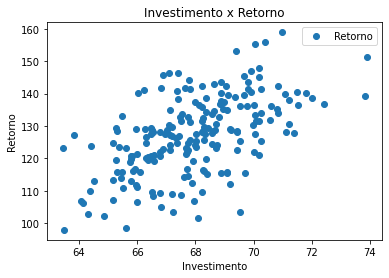

In [22]:
df.plot(x = 'Investimento',y= 'Retorno',style= 'o')
plt.title('Investimento x Retorno')
plt.xlabel('Investimento')
plt.ylabel('Retorno')
plt.savefig('images/first-graf.png')
plt.show()

### Data Preparation

In [23]:
x = df.iloc[:,:-1].values
y = df.iloc[:, 1].values

### Train and test division


In [24]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.3,random_state=0)

### Shape and data type adjust

In [25]:
X_train = X_train.reshape(-1,1).astype(np.float32)

### Model

In [26]:
model = LinearRegression()

## Model Training

In [27]:
model.fit(X_train,Y_train)
print("\n")
print("Modelo Treinado com sucesso")



Modelo Treinado com sucesso


### Printing B0 and B1 coefficient

In [28]:
print("\n")
print('B1 (coenf_)',model.coef_)
print('B0 (intercept_)',model.intercept_)



B1 (coenf_) [3.616159]
B0 (intercept_) -118.42083


### Plot Linear Regression
#### y = B0 + B1 * X

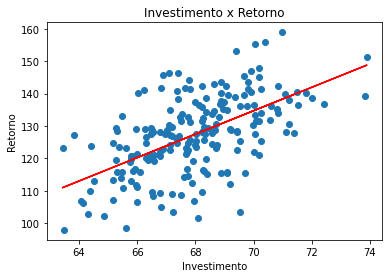

In [29]:
regression_line = model.coef_ * x + model.intercept_
plt.scatter(x,y)
plt.title('Investimento x Retorno')
plt.xlabel('Investimento')
plt.ylabel('Retorno')
plt.plot(x,regression_line,color='red')
plt.savefig('images/part1-regressionLine.png')
plt.show()

### Data test predict

In [32]:
y_predict = model.predict(X_test)

### Real X Pred

In [38]:
df_value = pd.DataFrame({'Valor real': Y_test,'Valor previsto': y_predict})
print('\n')
print(df_value)



    Valor real  Valor previsto
0       137.90      139.158173
1       122.61      132.649087
2       126.48      121.366671
3       128.14      123.030104
4       118.89      119.305460
5       109.17      123.066266
6       123.30      130.009291
7       133.84      129.539190
8       125.61      128.562827
9       120.82      121.981418
10      137.55      131.094139
11      123.29      118.907683
12      135.02      124.259598
13      136.74      143.533725
14      134.63      129.792321
15      136.46      134.746459
16      136.22      136.879993
17      132.58      128.454343
18      121.23      126.248486
19      128.52      128.382019
20      124.22      130.153937
21      116.46      128.418181
22      128.76      129.900806
23      115.91      117.750512
24      128.73      122.053741
25      135.29      130.877169
26      119.25      122.343034
27      129.15      120.101015
28      128.27      132.612925
29      106.45      120.173339
30      129.50      121.909095
31    

### Plot

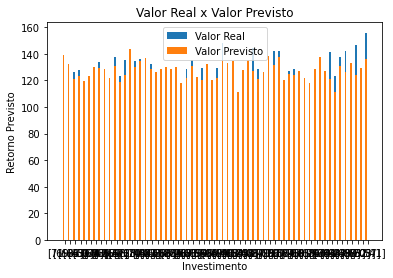

In [36]:
fig,ax = plt.subplots()
index = np.arange(len(X_test))
bar_width = 0.35
actual = plt.bar(index, df_value['Valor real'],bar_width,label = 'Valor Real')
predicted = plt.bar(index, df_value['Valor previsto'],bar_width,label='Valor Previsto')
plt.xlabel('Investimento')
plt.ylabel('Retorno Previsto')
plt.title('Valor Real x Valor Previsto')
plt.xticks(index + bar_width,X_test)
plt.legend()
plt.savefig('images/part1-actualvspredicted.png')
plt.show()

### Model classification

In [37]:
print('\n')
print(f'MAE (Mean Absolute Error): {mean_absolute_error(Y_test,y_predict)}')
print(f'MSE (Mean Squared Error): {mean_squared_error(Y_test,y_predict)}')
print(f'RMSE (Root Mean Squared Error): {math.sqrt(mean_squared_error(Y_test,y_predict))}')
print(f'R2 Score: {r2_score(Y_test,y_predict)}')



MAE (Mean Absolute Error): 7.997080134789149
MSE (Mean Squared Error): 107.93666404700726
RMSE (Root Mean Squared Error): 10.389257146062333
R2 Score: 0.20981305341618306


### Deploying and predict with new data

#### Receiving data

In [53]:
print('\n')
input_var = input("Digite o valor do investimento: R$")
input_var = float(input_var)
inpt = np.array([input_var])
inpt = inpt.reshape(-1,1)

## Predicting

In [54]:
pred = model.predict(inpt)

In [56]:
print(f'\nInvestindo R${input_var}, você tera um retorno previsto de R${pred[0]:.4}\n')



Investindo R$62.9, você tera um retorno previsto de R$109.0

